<p style="color:#FF0000";> Seria buena una introducción a la notebook, comentando qué grupo son, quienes lo integran, el objetivo del desafio, la presentación del dataset y un índice

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from unidecode import unidecode
import re

In [7]:
df_raw = pd.read_csv("properatti.csv")
df_raw.shape

(121220, 26)

# Exploracion inicial

In [8]:
# Eliminamos las columnas que no nos interesan para el analisis
df = df_raw.drop(["Unnamed: 0", "geonames_id", "floor",
                  "country_name","properati_url","image_thumbnail","place_with_parent_names"], axis= 1).copy()

In [9]:
print(len(df.columns))
regiones = (len(df["state_name"].unique()))
df.columns

19


Index(['operation', 'property_type', 'place_name', 'state_name', 'lat-lon',
       'lat', 'lon', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'rooms', 'expenses', 'description',
       'title'],
      dtype='object')

In [10]:
# Convertimos la columna Descripcion con unicode para evitar mayusculas y acentos.
desc_unicode = df['description'].apply(lambda x: x if x is np.NaN else unidecode(x)).str.lower()

In [11]:
# Convertimos la columna titulo con unicode para evitar mayusculas y acentos.
title_unicode = df['title'].apply(lambda x: x if x is np.NaN else unidecode(x)).str.lower()

<p style="color:#FF0000";> Muy bien hacer esto desde el inicio para evitarse problemas en el cualquier momento del procesamiento

In [12]:
df["description"] = desc_unicode
df['title'] = title_unicode

In [199]:
# Buscamos filas completamente duplicadas para eliminar sobrecarga de datos
cantidad_duplicados = df.duplicated().sum()
dataset_size = df.size

print(f"Hay una cantidad de : {cantidad_duplicados} duplicados")
print(f"El tamaño del dataset original es: {dataset_size}")
dataset_size

Hay una cantidad de : 5284 duplicados
El tamaño del dataset original es: 2303180


2303180

In [14]:
# Por lo tanto, la cantidad de registros no duplicados es dataset_size - cantidad_duplicados*(cantidad de columnas)
q_dataset_sin_duplicados = dataset_size - cantidad_duplicados*len(df.columns)
print(f"la cantidad de registros unicos : {q_dataset_sin_duplicados} registros")

la cantidad de registros unicos : 2202784 registros


<p style="color:#FF0000";>  Los requistos se miden por las filas, no por las celdas. Los 5284 duplicados corresponden a filas, por lo que habría 115000 aprox filas únicas. Por otro lado, dado que las columnas de descripción y título son de texto libre, sería oportuno  no incluirlas al momento de detectar duplicados ya que es muy probable que si se carga una propiedad 2 veces, estos campos sean distintos

In [15]:
# df_disint es el DataFrame sin las columnas eliminadas al inicio, sin los duplicados y con descripcion transformado con unicode y lowercase
df_distint = df.drop_duplicates().copy()
df_distint["description"] = desc_unicode

In [16]:
df_distint.duplicated().sum()

0

In [17]:
# Check de quita de duplicados
df_distint.size == q_dataset_sin_duplicados

True

In [18]:
cant_prop = df_distint["property_type"].value_counts()

In [19]:
# Desglose del Dataset | Valores y graficos con subplot
print(f"Total de registros: {cant_prop.sum()} propiedades")
print("---------------------------------------")
print("Desglose del Dataset:")
print(cant_prop)

Total de registros: 115936 propiedades
---------------------------------------
Desglose del Dataset:
apartment    66490
house        39756
PH            5618
store         4072
Name: property_type, dtype: int64


Text(0.5, 1.0, 'Grupo 4 | Properatti')

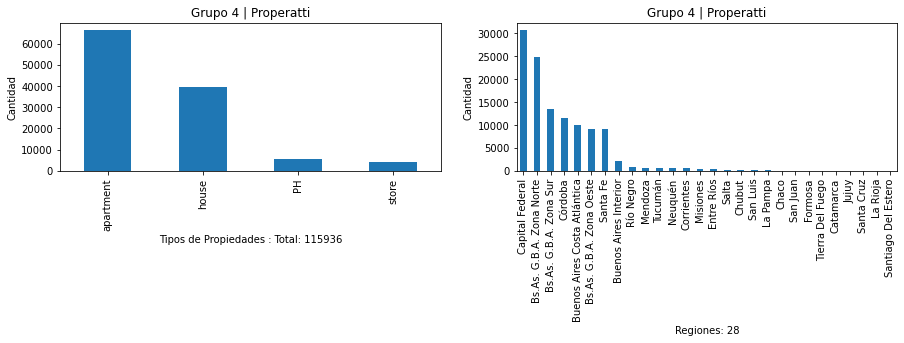

In [20]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,6)

plt.subplot(2,2,2)
df_distint.groupby("state_name")["state_name"].count().sort_values(ascending = False).plot(kind="bar")
plt.xlabel(f"Regiones: {regiones}")
plt.ylabel("Cantidad")
plt.title("Grupo 4 | Properatti")

plt.subplot(2,2,1)
df_distint.groupby("property_type")["property_type"].count().sort_values(ascending = False).plot(kind="bar")
plt.xlabel(f"Tipos de Propiedades : Total: {cant_prop.sum()}")
plt.ylabel("Cantidad")
plt.title("Grupo 4 | Properatti")


<p style="color:#FF0000";> Tal vez sea mejor idea presentar los gráficos uno abajo del otro, asi se puede leer el segundo con mayor facilidad

In [21]:
# Este cuando lo ordenas para que quede bien , te mueve los numeros, tendriamos q preguntar como hacerlo de otra manera.
# eliminamos esto en el compilado

# fig, ax = plt.subplots(1,2)
# fig.set_size_inches(15,6)

# plt.subplot(2,2,1)
# x11 = df_distint["property_type"].unique()
# y11 = df_distint.groupby("property_type")["property_type"].count()
# plt.xticks(rotation=90)
# plt.bar(x11,y11,  0.8)
# plt.ylim([0,max(y11)+25000])
# # plt.xlabel("Tipos de propiedades")
# plt.ylabel("Cantidad")
# plt.title(f"TP | Grupo 4 - Cantidad de propiedades: {cant_prop.sum()}")


# for i in range(len(x11)):    
#     plt.text(i,y11[i],f"  {y11[i]}", ha="center",va="bottom", rotation = 90)


# plt.subplot(2,2,2)
# x1 = df_distint["state_name"].unique()
# y1 = df_distint.groupby("state_name")["state_name"].count()
# plt.xticks(rotation=90)
# plt.bar(x1,y1,0.8)
# plt.ylim([0,max(y1)+15000])
# # plt.xlabel("Regiones")
# plt.ylabel("Cantidad de Propiedades")
# plt.title("TP | Grupo 4 - Propiedades por Region")

# for i in range(len(x1)):    
#     plt.text(i,y1[i],f"  {y1[i]}", ha="center",va="bottom" , rotation = 90)


In [22]:
df_distint.duplicated().sum()

0

In [23]:
data = df_distint.copy()

In [24]:
# Chequeo de duplicados en el nuevo DataFrame
data.duplicated().sum()

0

In [25]:
# Porcentaje total de datos completos por campo.
(data.notnull().mean())*100

operation                     100.000000
property_type                 100.000000
place_name                     99.980161
state_name                    100.000000
lat-lon                        58.441726
lat                            58.441726
lon                            58.441726
price                          84.973606
currency                       84.972744
price_aprox_local_currency     84.973606
price_aprox_usd                84.973606
surface_total_in_m2            66.909329
surface_covered_in_m2          83.792782
price_usd_per_m2               57.612821
price_per_m2                   73.870929
rooms                          39.742617
expenses                       12.138594
description                    99.998275
title                         100.000000
dtype: float64

In [26]:
#Datos iniciales
data.shape

(115936, 19)

In [27]:
Proporcion = data["state_name"].value_counts()

In [28]:
Proporcion[0:6].sum()
print(Proporcion[0:6])
# print("-----------------------------------------------------------------------------------")
# print(f"Estas regiones representan el {round(Proporcion[0:6].sum(),2)*100} % de los datos")

Capital Federal                 30731
Bs.As. G.B.A. Zona Norte        24745
Bs.As. G.B.A. Zona Sur          13550
Córdoba                         11515
Buenos Aires Costa Atlántica     9914
Bs.As. G.B.A. Zona Oeste         9033
Name: state_name, dtype: int64


In [29]:
# Chequeo de la cantidad de propiedades por region con pivot table
data.pivot_table(index = "state_name", columns = "property_type", values =["operation"],aggfunc = np.size , margins = True,fill_value=0)

operation                               
property_type                       PH apartment  house store     All
state_name                                                           
Bs.As. G.B.A. Zona Norte           979     10067  13113   586   24745
Bs.As. G.B.A. Zona Oeste           788      3348   4645   252    9033
Bs.As. G.B.A. Zona Sur             820      5139   6959   632   13550
Buenos Aires Costa Atlántica       574      6391   2665   284    9914
Buenos Aires Interior               47       815   1316    73    2251
Capital Federal                   1807     25548   2057  1319   30731
Catamarca                            0        12     15     0      27
Chaco                                0        19     35     3      57
Chubut                               6        39    173    41     259
Corrientes                          57       139    357    21     574
Córdoba                            324      6347   4381   463   11515
Entre Ríos                           5       131    210    10     356
Formosa                              0        21     11     0      32
Jujuy                                0        10     15     1      26
La Pampa                             0        45     98    10     153
La Rioja                             0         2      2     0       4
Mendoza                              6       304    321    25     656
Misiones                             8       130    261     7     406
Neuquén                             84       272    219    11     586
Río Negro                           26       310    374    82     792
Salta                                5       127    142     2     276
San Juan                             0        16     23     1      40
San Luis                             2        31    198    14     245
Santa Cruz                           0         1     18     1      20
Santa Fe                            76      6826   1917   200    9019
Santiago Del Estero                  0         1      3     0       4
Tierra Del Fuego                     0        12     16     3      31
Tucumán                              4       387    212    31     634
All                               5618     66490  39756  4072  115936

<p style="color:#FF0000";>  Muy buen uso de la tabla pivot para explorar la información ! 

In [30]:
data_pivot = data.pivot_table(index = "state_name", columns = "property_type", values =["operation"],aggfunc = np.size , margins = True,fill_value=0)

In [31]:
d_pivot = data_pivot["operation"].copy()

In [202]:
# d_pivot.drop("All",axis=0 , inplace = True)
d_pivot = d_pivot.drop("All",axis=1)

KeyError: "['All'] not found in axis"

<AxesSubplot:xlabel='state_name'>

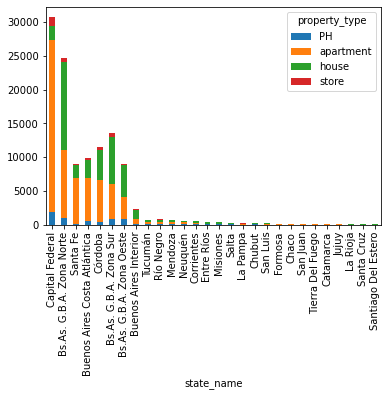

In [203]:
d_pivot.sort_values(["apartment","house"], inplace = True , ascending = False)
d_pivot.plot.bar(stacked = True)

<p style="color:#FF0000";> Habría que excluir la columna 'All' porque distorisiona la escala  y no se puede observar el resto de las categorías

In [34]:
d_pivot_columns = d_pivot.columns
d_pivot_values = d_pivot.values
# print(d_pivot_values,d_pivot_columns)
d_pivot_values[0]

array([ 5618, 66490, 39756,  4072])

In [35]:
# Tipos de moneda
data["currency"].unique()

array(['USD', nan, 'ARS', 'PEN', 'UYU'], dtype=object)

In [36]:
data["currency"].value_counts()

USD    85871
ARS    12640
PEN        2
UYU        1
Name: currency, dtype: int64

In [37]:
# Quizas estos primero los tenemos que convertir a pesos y luego a USD , la conversion a USD la esta haciendo al tipo de cambio
# de Argentina.
data.loc[data["currency"]=="UYU",:]["description"]


107390    casa con calefaccion central, mendoza, san roq...
Name: description, dtype: object

# Limpieza y ordenamiento del data set

Completar datos faltantes

In [38]:
# Estado inicial, datos completos por campo
(data.notnull().mean())*100

operation                     100.000000
property_type                 100.000000
place_name                     99.980161
state_name                    100.000000
lat-lon                        58.441726
lat                            58.441726
lon                            58.441726
price                          84.973606
currency                       84.972744
price_aprox_local_currency     84.973606
price_aprox_usd                84.973606
surface_total_in_m2            66.909329
surface_covered_in_m2          83.792782
price_usd_per_m2               57.612821
price_per_m2                   73.870929
rooms                          39.742617
expenses                       12.138594
description                    99.998275
title                         100.000000
dtype: float64

Primera pasada para completar price_usd_m2

In [39]:
# Registros sin el precio/m2
mask_price_usd_m2 = data['price_usd_per_m2'].isnull()
data[mask_price_usd_m2].sample(10)

,operation,property_type,place_name,state_name,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,description,title
29936,sell,house,Córdoba,Córdoba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1720.0,245.0,NaN,NaN,4.0,NaN,venta - casa - 3 dormitorios - villa belgrano ...,casa en venta
95271,sell,house,Florida,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,550000.0,USD,9704475.00,550000.00,NaN,255.0,NaN,2156.862745,NaN,NaN,hermoso chalet en dos plantas proximo al coleg...,libertad al 2600 - florida mitre/este
30410,sell,PH,Quilmes,Bs.As. G.B.A. Zona Sur,"-34.73906,-58.28836",-34.739060,-58.288360,110000.0,USD,1940895.00,110000.00,NaN,20.0,NaN,5500.000000,3.0,NaN,corredor responsable: martin veltri - cmq 805c...,venta ph tipo casa en planta alta quilmes
66125,sell,apartment,Palermo,Capital Federal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,48.0,NaN,NaN,NaN,NaN,"unidades de 1, 2 y 3 ambientes. el edificio se...",departamento en palermo
37140,sell,apartment,Punilla,Córdoba,"-31.4207828,-64.4992141",-31.420783,-64.499214,1600000.0,ARS,1583309.44,89733.88,NaN,50.0,NaN,32000.000000,NaN,NaN,codigo: 2347-495 ubicado en: villa carlos paz ...,"muy lindo departamento en venta, edif. village..."
23514,sell,apartment,Rosario,Santa Fe,"-32.9518006,-60.6307056",-32.951801,-60.630706,60000.0,USD,1058670.00,60000.00,NaN,NaN,NaN,NaN,NaN,NaN,codigo: 2062-650 ubicado en: 1 de mayo 1100 - ...,"venta depto monoambiente ., totalmente equipad..."
37461,sell,house,Tristán Suárez,Bs.As. G.B.A. Zona Sur,"-34.908986,-58.551679",-34.908986,-58.551679,495000.0,USD,8734027.50,495000.00,NaN,330.0,NaN,1500.000000,6.0,NaN,corredor responsable: maximiliano vazquez - c....,casa 3 dorm. playroom quincho piscina
86562,sell,house,Escobar,Bs.As. G.B.A. Zona Norte,"-34.3677484,-58.7647862",-34.367748,-58.764786,165000.0,USD,2911342.50,165000.00,NaN,165.0,NaN,1000.000000,NaN,NaN,"casa en dos plantas, ambientes muy amplios, co...",moderna casa de ambientes amplisimos en maschwitz
56868,sell,apartment,Villa Luro,Capital Federal,"-34.637834,-58.503098",-34.637834,-58.503098,172000.0,USD,3034854.00,172000.00,NaN,86.0,NaN,2000.000000,3.0,NaN,corredor responsable: marcelo trujillo - cucic...,"nuevo desarrollo, edificio solar de villa luro."
25040,sell,house,Buenos Aires Interior,Buenos Aires Interior,NaN,NaN,NaN,3000000.0,USD,52933500.00,3000000.00,NaN,125.0,NaN,24000.000000,2.0,NaN,"excelente fraccion de campo agricola, con casa...",vendo campo pequeos inversores


In [40]:
#Crear copia para limpiar
price_usd_per_m2_clean = data['price_usd_per_m2'].copy()
(price_usd_per_m2_clean.isnull().sum()) / price_usd_per_m2_clean.shape[0] * 100
print('Dato price_usd_per_m2_clean cargado inicialmente: ', 100 - ((price_usd_per_m2_clean.isnull().sum()) / price_usd_per_m2_clean.shape[0] * 100))

Dato price_usd_per_m2_clean cargado inicialmente:  57.61282086668507


In [41]:
# Funcion para primera completada de precio/m2
def price_per_m2_clean (price_aprox_usd, surface_covered_in_m2, surface_total_in_m2, price_usd_per_m2):
    #hago una lista para cargar superficies, si son todos null, queda solo 1
    surfaces = [1, 1]
    if math.isnan(price_usd_per_m2):  #Si precio/m 2 es nulo ver de calcularlo
        #valido si las superficies y el precio estan cargadas, tomo la superficie máxima para calcular el precio
        if not (math.isnan(surface_total_in_m2)):
            surfaces[0] = surface_total_in_m2
        if not (math.isnan(surface_covered_in_m2)):
            surfaces[1] = surface_covered_in_m2
        #Si tengo el precio y alguna de las superficies, calculo el nuevo precio/m2
        if not (math.isnan(price_aprox_usd)) and (surfaces[0] > 1 or surfaces[1] > 1): 
            return price_aprox_usd / max(surfaces)
    return price_usd_per_m2

In [42]:
price_usd_per_m2_clean = data.apply(lambda x: price_per_m2_clean(x['price_aprox_usd'], x['surface_covered_in_m2'], 
                                                                 x['surface_total_in_m2'], x['price_usd_per_m2']), axis = 1)

In [43]:
print('price_usd_per_m2_clean cargado: ', 100 - ((price_usd_per_m2_clean.isnull().sum()) / price_usd_per_m2_clean.shape[0] * 100))

price_usd_per_m2_clean cargado:  78.11982473088601



Segunda pasada, completando datos de superficie y de precio

Primero completar datos de superficie faltante, van a superficie total

In [44]:
# Buscar los registros con numeros de superficie

patron_sup = '(?P<nsup>\d+[\,]?[\.]?\d*)\s*(?:m2|metros|sup)'
regex_sup = re.compile(patron_sup)

superficies_reg = data['description'].apply(lambda x: x if x is np.NaN else regex_sup.findall(x))
superficies_reg

0              []
1              []
2              []
3              []
4              []
           ...   
121215         []
121216      [572]
121217    [43,00]
121218         []
121219       [77]
Name: description, Length: 115936, dtype: object

In [45]:
# Funcion para convertir las listas que da findall a numero, tomar solo el maximo

def convert_float(x):
    if len(x)>0:
        x = [i.replace(',','.') for i in x]
        x = [i.replace('..','.') for i in x]
        return np.array(x, dtype=float).max()
    else:
        return np.NaN

In [46]:
surface_regex = superficies_reg.apply(lambda x: x if x is np.NaN else convert_float(x))
surface_regex.values

array([nan, nan, nan, ..., 43., nan, 77.])

In [47]:
surface_regex.isnull().value_counts()

True     82423
False    33513
Name: description, dtype: int64

In [48]:
# Máscara para ver que valores estaría completando, que no tenian la superficie de antes

np.logical_and(data['surface_covered_in_m2'].isnull(), surface_regex.notnull()).value_counts()

False    111384
True       4552
dtype: int64

In [49]:
# Combinar la superficie extraida del regex con la existente

surface_covered_in_m2_clean_2 = data['surface_covered_in_m2'].copy()
surface_covered_in_m2_clean_2.loc[np.logical_and(data['surface_covered_in_m2'].isnull(), surface_regex.notnull())] = surface_regex

A continuación intentaremos completar la mayor cantidad posible de precios en USD faltantes

In [50]:
data['price_aprox_usd'].isnull().sum()

17421

In [51]:
#% de no nulos:
perc_notnull_precios_inicial = data['price_aprox_usd'].notnull().sum()*100 / data.shape[0]
perc_notnull_precios_inicial

84.97360612751864

Busqueda de precios en Title para registros con precios nulos (luego se realizará sobre Description) Se comienza sobre Title ya que la información de precios es más accesible que en Description.

In [52]:
title_serie = data['title']

In [53]:
title_serie.sample(15)

4866                                 excelente ph en venta
80911                      excelente casa de corte antiguo
35939                      local en el centro de la ciudad
20423    departamento 23m2 con cochera, san fernando, v...
93230                                departamento en venta
91615        venta departamento 4 ambientes - barrio norte
28512                                   departamento venta
34361    dpt122- departamento de 1 dormitorio en miguel...
84826                         departamento - nueva cordoba
72609                                casa - banfield oeste
86565                           departamento - general paz
18649               departamento de 4 ambientes a la calle
22602    excelente monoambiente 1era categoria/palermo ...
79906                         departamento en los castanos
52702                           casa en millamapu en venta
Name: title, dtype: object

In [54]:
usd_pattern_title = "(?:usd|us\$|u\$s|us|u\$d|dolares)(?:\s)(?P<Price_usd>\d+[\.]?[\,]?\d*)"
usd_title_regex = re.compile(usd_pattern_title)

In [55]:
title_uni_lower_match = title_serie.apply(lambda x:  x if x is np.NaN else usd_title_regex.search(x))

In [56]:
title_uni_lower_match

0         None
1         None
2         None
3         None
4         None
          ... 
121215    None
121216    None
121217    None
121218    None
121219    None
Name: title, Length: 115936, dtype: object

In [57]:
mask_title_usd_match_notnull = title_uni_lower_match.notnull()

In [58]:
mask_null_precios = data['price_aprox_usd'].isnull()

In [59]:
mask_title_usd = np.logical_and(mask_title_usd_match_notnull, mask_null_precios)
#Aplicamos ambas máscaras, ya que solo nos interesa completar los registros nulos de price_aprox_usd

In [60]:
title_uni_lower_match[mask_title_usd] 

1665      <re.Match object; span=(0, 11), match='u$d 260...
1666      <re.Match object; span=(0, 11), match='u$d 115...
1667      <re.Match object; span=(0, 11), match='u$d 740...
1669      <re.Match object; span=(0, 11), match='u$d 740...
1677      <re.Match object; span=(0, 11), match='u$d 115...
                                ...                        
50055     <re.Match object; span=(57, 67), match='u$s 10...
50056     <re.Match object; span=(57, 67), match='u$s 23...
50057     <re.Match object; span=(49, 59), match='u$s 18...
79472     <re.Match object; span=(38, 49), match='u$s 30...
103676    <re.Match object; span=(71, 81), match='u$s 55...
Name: title, Length: 2167, dtype: object

In [61]:
data.loc[mask_title_usd, "PriceUSD_Clean"] = title_uni_lower_match[mask_title_usd].apply(lambda x: x.group("Price_usd"))

In [62]:
data.loc[mask_title_usd, ["price_aprox_usd", "PriceUSD_Clean"]]

,price_aprox_usd,PriceUSD_Clean
1665,NaN,260.000
1666,NaN,115.000
1667,NaN,740.000
1669,NaN,740.000
1677,NaN,115.000
...,...,...
50055,NaN,101000
50056,NaN,235000
50057,NaN,180000
79472,NaN,300.000


In [63]:
data.loc[mask_title_usd, ["PriceUSD_Clean"]].isnull().sum()

PriceUSD_Clean    0
dtype: int64

Pasamos el tipo de dato a Float

In [64]:
PriceUSD_Clean_float = data.loc[mask_title_usd, ["PriceUSD_Clean"]].astype('float')
PriceUSD_Clean_float

,PriceUSD_Clean
1665,260.0
1666,115.0
1667,740.0
1669,740.0
1677,115.0
...,...
50055,101000.0
50056,235000.0
50057,180000.0
79472,300.0


Aplicamos máscara booleana para encontrar los registros que figuran con valores menor a mil usd

In [65]:
mask_Price_float = (PriceUSD_Clean_float<1000)
PriceUSD_Clean_float[mask_Price_float]

,PriceUSD_Clean
1665,260.0
1666,115.0
1667,740.0
1669,740.0
1677,115.0
...,...
50055,NaN
50056,NaN
50057,NaN
79472,300.0


Multiplicamos los valores por mil para que sean numeros coherentes

<p style="color:#FF0000";> Polémica decisión. ¿Cuáles son los argumentos? Siempre es preferible resignar observaciones que meter ruido. Más si estamos hablando de la variable target o variables auxiliares que podrían utilizarse para reconstruir a la target.

In [66]:
PriceUSD_Clean_float_product = PriceUSD_Clean_float[mask_Price_float]* 1000
PriceUSD_Clean_float_product

,PriceUSD_Clean
1665,260000.0
1666,115000.0
1667,740000.0
1669,740000.0
1677,115000.0
...,...
50055,NaN
50056,NaN
50057,NaN
79472,300000.0


Eliminamos los NaN, ya que lo que buscamos es reescribir los valores de la columna con precios coherentes.

In [67]:
PriceUSD_Clean_float_product = PriceUSD_Clean_float_product.dropna()
PriceUSD_Clean_float_product

,PriceUSD_Clean
1665,260000.0
1666,115000.0
1667,740000.0
1669,740000.0
1677,115000.0
...,...
22370,125000.0
25757,35080.0
48651,68000.0
79472,300000.0


In [68]:
PriceUSD_Clean_float_product.describe() #Vemos que hay registros con valor 1000 usd (es decir que originalmente figuraban como 1 usd)

,PriceUSD_Clean
count,2162.000000
mean,191274.279833
std,153040.466345
min,1000.000000
25%,90000.000000
50%,140000.000000
75%,250000.000000
max,980000.000000


In [69]:
PriceUSD_Clean_float_product_copy=PriceUSD_Clean_float_product.copy()

Multiplicaremos los valores menores a usd 10000 por 100 para que sean numeros coherentes

<p style="color:#FF0000";> Demasiado forzado estas multiplicaciones. No hay sustento claro de por qué se hace. Si hubiesen observaciones que dijeran "100 mil" o algo por el estilo, habría quebuscarlo con regex. Hay que sacar esta parte del procesamiento para el deasfio 2 porque sino les va a traer mucho ruido

In [70]:
mask_under_10000_title = PriceUSD_Clean_float_product < 10000

In [205]:
corected_values = PriceUSD_Clean_float_product.loc[mask_under_10000_title.values] * 100
corected_values.sample(10)

,PriceUSD_Clean
2603,100000.0
2414,110000.0
2669,100000.0
2630,100000.0
2635,100000.0
2530,100000.0
2006,100000.0
1936,123400.0
2631,100000.0
2619,100000.0


In [72]:
mask_index_corected_values = corected_values.index
PriceUSD_Clean_float_product_copy.loc[mask_index_corected_values] = corected_values
PriceUSD_Clean_float_product_copy

,PriceUSD_Clean
1665,260000.0
1666,115000.0
1667,740000.0
1669,740000.0
1677,115000.0
...,...
22370,125000.0
25757,35080.0
48651,68000.0
79472,300000.0


In [73]:
PriceUSD_Clean_float_product_copy.describe()

,PriceUSD_Clean
count,2162.000000
mean,194034.923682
std,151123.847989
min,11800.000000
25%,95000.000000
50%,144000.000000
75%,250000.000000
max,980000.000000


Reescribimos los valores en la columna PriceUSD_Clean

In [74]:
data.loc[PriceUSD_Clean_float_product.index, ["PriceUSD_Clean"]] = PriceUSD_Clean_float_product_copy
data.loc[mask_title_usd, ["PriceUSD_Clean"]]

,PriceUSD_Clean
1665,260000
1666,115000
1667,740000
1669,740000
1677,115000
...,...
50055,101000
50056,235000
50057,180000
79472,300000


In [75]:
data["PriceUSD_Clean"].isnull().sum()

113769

In [76]:
data["PriceUSD_Clean"].notnull().sum()

2167

Rellenamos PriceUSD_Clean con los valores no nulos originales que tenemos de la columna price_aprox_usd

In [77]:
data.loc[data.loc[data["price_aprox_usd"].notnull(), ["price_aprox_usd"]].index, ["PriceUSD_Clean"]]= \
        data.loc[data["price_aprox_usd"].notnull(), ["price_aprox_usd"]].values
data["PriceUSD_Clean"]

0          62000
1         150000
2          72000
3          95000
4          64000
           ...  
121215    870000
121216    498000
121217    131500
121218     95900
121219    129000
Name: PriceUSD_Clean, Length: 115936, dtype: object

In [78]:
data["PriceUSD_Clean"].isnull().sum()

15254

Verificación de que la cantidad de nulos en PriceUSD_Clean es la cantidad de nulos en price_aprox_usd menos los registros rellenados:

In [79]:
data["price_aprox_usd"].isnull().sum() - 2167

15254

<p style="color:#FF0000";> Hay que evitar escribir números absolutos en la notebook porque si cambiamos algo dle procesamiento anterior ese "2167" podría variar y no se veria reflejado en esta celda

In [80]:
print('Porcentaje de no nulos inicial:', round(perc_notnull_precios_inicial,2))
print('Nuevo porcentaje de no nulos:', round(data["PriceUSD_Clean"].notnull().sum()*100/data.shape[0],2))

Porcentaje de no nulos inicial: 84.97
Nuevo porcentaje de no nulos: 86.84


Ahora se intentará rellenar la mayor cantidad posibles de precios nulos con la columna Description.

In [81]:
description_uni_lower = data['description']
description_uni_lower

0         2 ambientes tipo casa planta baja por pasillo,...
1         venta de departamento en decimo piso al frente...
2         2 ambientes 3er piso lateral living comedor am...
3         ph 3 ambientes con patio. hay 3 deptos en lote...
4         departamento con fantastica iluminacion natura...
                                ...                        
121215    torre forum alcorta - maxima categoria.impecab...
121216    excelente e impecable casa en venta en las lom...
121217    venta departamento ambiente divisible a estren...
121218    2 amb al contrafrente,  luminoso. el departame...
121219    departamento de 77 m2 apto profesional. edific...
Name: description, Length: 115936, dtype: object

In [82]:
usd_pattern_description = "(?:usd|us\$|u\$s|u\$d|dolares)(?:\s?\s?)(?P<Price_usd>\d+[\.]?[\,]?\d*)"
usd_description_regex = re.compile(usd_pattern_description)

In [83]:
description_match = description_uni_lower.apply(lambda x: x if x is np.NaN else usd_description_regex.findall(x))
description_match

0               []
1         [20.000]
2               []
3               []
4               []
            ...   
121215          []
121216          []
121217    [20.000]
121218    [95.900]
121219          []
Name: description, Length: 115936, dtype: object

In [84]:
description_match_float = description_match.apply(lambda x: x if x is np.NaN else convert_float(x))
description_match_float

0          NaN
1         20.0
2          NaN
3          NaN
4          NaN
          ... 
121215     NaN
121216     NaN
121217    20.0
121218    95.9
121219     NaN
Name: description, Length: 115936, dtype: float64

In [85]:
description_match_float.notnull().sum()

12319

In [86]:
mask_PriceUSD_Clean_null = data["PriceUSD_Clean"].isnull()

In [87]:
description_match_float[mask_PriceUSD_Clean_null]

5           NaN
20          NaN
41          NaN
62          NaN
67          NaN
          ...  
121210      NaN
121211      NaN
121212      NaN
121213      NaN
121214    1.619
Name: description, Length: 15254, dtype: float64

In [88]:
mask_description_match_notnull = description_match_float.notnull()

In [89]:
description_match_float[mask_description_match_notnull]

1          20.000
15        250.000
24        380.940
25        385.640
28        390.700
           ...   
121139      2.589
121143    305.000
121214      1.619
121217     20.000
121218     95.900
Name: description, Length: 12319, dtype: float64

In [90]:
mask_PriceUSD_Clean_null = data["PriceUSD_Clean"].isnull()

In [91]:
description_match_float[mask_description_match_notnull & mask_PriceUSD_Clean_null]

126         1.000
263       240.000
264       220.000
273         1.000
275         1.000
           ...   
120895     20.000
120897     20.000
120908     20.000
120912     20.000
121214      1.619
Name: description, Length: 656, dtype: float64

In [92]:
description_match_float[mask_description_match_notnull & mask_PriceUSD_Clean_null].describe()

count       656.000000
mean        708.372691
std        7230.408848
min           0.000000
25%           1.000000
50%           4.100000
75%          57.000000
max      150000.000000
Name: description, dtype: float64

In [93]:
description_match_float[mask_description_match_notnull & mask_PriceUSD_Clean_null].notnull().sum()

656

In [94]:
description_values_available=description_match_float[mask_description_match_notnull & mask_PriceUSD_Clean_null]

Se realiza el mismo tratamiento que se efectuó en Title, con los valores menores a 1000 y 10000:

<p style="color:#FF0000";> Mal

In [95]:
mask_values_under_1000_description=description_values_available<1000

In [96]:
description_values_available[mask_values_under_1000_description]

126         1.000
263       240.000
264       220.000
273         1.000
275         1.000
           ...   
120895     20.000
120897     20.000
120908     20.000
120912     20.000
121214      1.619
Name: description, Length: 623, dtype: float64

In [97]:
descriptrion_product=description_values_available*1000
descriptrion_product

126         1000.0
263       240000.0
264       220000.0
273         1000.0
275         1000.0
            ...   
120895     20000.0
120897     20000.0
120908     20000.0
120912     20000.0
121214      1619.0
Name: description, Length: 656, dtype: float64

In [98]:
description_values_available[mask_values_under_1000_description]=descriptrion_product
description_values_available[mask_values_under_1000_description]

126         1000.0
263       240000.0
264       220000.0
273         1000.0
275         1000.0
            ...   
120895     20000.0
120897     20000.0
120908     20000.0
120912     20000.0
121214      1619.0
Name: description, Length: 623, dtype: float64

In [99]:
mask_values_under_10000_description = description_values_available<10000

In [100]:
description_values_available[mask_values_under_10000_description]

126       1000.0
273       1000.0
275       1000.0
661       1000.0
1412      1000.0
           ...  
119840    1000.0
120031    1000.0
120042    1000.0
120312    1990.0
121214    1619.0
Name: description, Length: 360, dtype: float64

In [101]:
descriptrion_product2 = description_values_available[mask_values_under_10000_description]*100
descriptrion_product2

126       100000.0
273       100000.0
275       100000.0
661       100000.0
1412      100000.0
            ...   
119840    100000.0
120031    100000.0
120042    100000.0
120312    199000.0
121214    161900.0
Name: description, Length: 360, dtype: float64

In [102]:
description_values_available[mask_values_under_10000_description] = descriptrion_product2
description_values_available[mask_values_under_10000_description]

126       100000.0
273       100000.0
275       100000.0
661       100000.0
1412      100000.0
            ...   
119840    100000.0
120031    100000.0
120042    100000.0
120312    199000.0
121214    161900.0
Name: description, Length: 360, dtype: float64

In [103]:
description_values_available.describe()

count       656.000000
mean     115849.198476
std      119712.606494
min           0.000000
25%       59250.000000
50%      100000.000000
75%      100000.000000
max      900000.000000
Name: description, dtype: float64

In [104]:
data.loc[description_values_available.index, ["PriceUSD_Clean"]] = description_values_available.values
data.loc[description_values_available.index, ["PriceUSD_Clean"]]

,PriceUSD_Clean
126,100000
263,240000
264,220000
273,100000
275,100000
...,...
120895,20000
120897,20000
120908,20000
120912,20000


In [105]:
data["PriceUSD_Clean"].isnull().sum()

14598

In [106]:
print('Porcentaje de no nulos inicial:', perc_notnull_precios_inicial)
print('Nuevo porcentaje de no nulos:', data["PriceUSD_Clean"].notnull().sum()*100/data.shape[0])
print('Cantidad de precios encontrados:', data['PriceUSD_Clean'].notnull().sum() - data['price_aprox_usd'].notnull().sum())

Porcentaje de no nulos inicial: 84.97360612751864
Nuevo porcentaje de no nulos: 87.40857024565277
Cantidad de precios encontrados: 2823


In [107]:
pd.options.display.max_colwidth = 1000000

Se visualiza que en los campos donde no encontró ningun valor la regex, no se explicita un valor en dolares de la propiedad:

In [108]:
data.loc[data["PriceUSD_Clean"].isnull(),  ['description']]

,description
5,"casa en el perimetro del barrio 338, ubicada en el extremo sur este del barrio, sobre calle 3 de caballeria casi nagera. vista libre a terreno en frente.consta de dos dormitorios, bano, living cocina comedor integrado de buen tamano, lavadero con despensero en aluminio.patio privado con churrasquera, tapiales y puerta de acceso de servicio. frente con rejas y pequeno patio con verde, porch de acceso.gas natural en la puerta. aire acondicionado frio/calor. baulera para guardado sobre pasillo. muy buen estado en general de pisos, revestimientos, pintura, etc.apto credito. aviso publicado por pixel inmobiliario (servicio de paginas web para inmobiliarias)."
20,"consta de: comedor-cocina, cuatro dormitorios (uno con bano en suite), un bano, otro bano para terminar, cuarto de herramientas y amplio parque."
41,"""arecas"" es un complejo de duplex y departamentos de primera calidad constructiva ubicado en el mejor barrio residencial de villa carlos paz. pensamos en brindarles una opcion acorde a cada necesidad: para la persona o familia que busca su vivienda, el ahorrista que elige una vivienda en construccion para capitalizarse y el inversionista que apuesta a la excelente renta que ofrece la villa en alquileres temporarios. * financiacion: financiacion propia | max. rentabilidad 100% pesos | cuotas convenidas * ubicacion privilegiada a metros de la costanera del lago san roque . * departamentos de 1, 2 y 3 dorm. * barrio con zona comercial propia * calidad constructiva * entrega pactada* desarrollo: mp innovacion & desarrollo * comercializadora: mam inmobiliariabonificacion por pago de contado- consulte:- 351-7061857 (maria)- 86 (noelia)"
62,"casa moderna en dos plantas.pb : living con hogar, cocina-comedor diario, toilette de recepcion, lavadero y estudio, todos los pisos de ceramicos, carpinteria exterior en aluminio blanco con doble vidrio.pa: hall de distribucion, con pequeno espacio para escritorio y placard. dos dormitorios, bano compartido y suite con vestidor. todos los pisos flotantes."
67,planta alta: dormitorio en suite - balconplanta baja: 2 dormitorios - bano - cocina - living/comedor - lavadero - patio- fondo libre- entrada de auto - local con banoconsulte valor
...,...
121207,"puertos- barrio vistas - l. 88casa en venta sobre lote interno puertos, barrio vistas .planta baja , living comedor , cocina con isla movible , escritorio , cuarto de servicio , bano completo , lavadero con parrilla .planta alta , 3 dormitorios , 2 banos completos , cuarto principal con vestidor y salida a la terraza con vista al lago. toda la casa cuenta con doble vidrio ( dvh) y contramarcos , losa radiante , tratamiento plastico fino de tarquini tanto en exterior como interior , pisos de porcelanato, exterior 210 m2 de pisos en porfido , todas las mesadas de marmol , artefactos de iluminacion exterior e interior de led ."
121210,"dos viviendas en block en excelente ubicacion a 50 mts de dardo rocha y 2 cuadras de av. fleming apto vivienda, oficina, comercio, profesional, una al fte en 1 planta living comedor, cocina 2 dormitorios, bano. cochera, lavadero, jdin al fdo, atras otra vivienda en 2 plantas liv com coc bano y en la pa (no esta en plano) 2 dorm c/vestidor bano."
121211,"excelente departamento de categoria con vistas parciales al rio en exclusivo barrio cerrado ""barrancas al rio"". pallier privado, hall, toilette y guarda ropa. living y comedor con salida a balcon terraza. amplia cocina con comedor diario, dependencia de servicio, lavadero, 3 dormitorios, 2 banos, 1 en suite,gran baulera, doble cochera fija cubierta, splits frio-calor en todos los ambientes, calefaccion por piso electrico. el condominio cuenta con pileta climatizada, jardines, cocheras de cortesia, sum y seguridad 24 hs."
121212,espectacular casa estilo racionalista en calle cortada!!! tiene una renta activa hasta octubre de 2017p.b: espectacular hall de entrada con triple altura - toilette - gran living apaisado con chimenea - comedor separado (5 x 

In [109]:
data['PriceUSD_Clean'] = data['PriceUSD_Clean'].astype('float')

In [110]:
#Fin de relleno de valores nulos de precios.

In [111]:
data.columns

Index(['operation', 'property_type', 'place_name', 'state_name', 'lat-lon',
       'lat', 'lon', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'rooms', 'expenses', 'description',
       'title', 'PriceUSD_Clean'],
      dtype='object')

In [112]:
# Funcion para segunda completada de precio/m2
def price_per_m2_clean_2 (price_aprox_usd, PriceUSD_Clean, surface_covered_in_m2_clean, price_usd_per_m2):
    if math.isnan(price_usd_per_m2):  #Si precio/m 2 es nulo ver de calcularlo
        #valido si las superficies y el precio estan cargadas, tomo la superficie máxima para calcular el precio
        #Si tengo el precio y la superficie via regex calculo el nuevo precio/m2
        if not (math.isnan(price_aprox_usd)) and not (math.isnan(surface_covered_in_m2_clean)): 
            return (price_aprox_usd / surface_covered_in_m2_clean)
        elif not (math.isnan(PriceUSD_Clean)) and not (math.isnan(surface_covered_in_m2_clean)):
            return (PriceUSD_Clean / surface_covered_in_m2_clean)    
    return price_usd_per_m2

<p style="color:#FF0000";> Acá es cuando metemos todo el ruido recolectado en la variable target del modelo

In [113]:
# Cargar las nuevas columnas a data para correr la segunda pasada de la funcion

data['surface_covered_in_m2_clean'] = surface_covered_in_m2_clean_2
data['price_usd_per_m2_clean'] = price_usd_per_m2_clean
price_usd_per_m2_clean_2 = data.apply(lambda x: price_per_m2_clean_2( x['price_aprox_usd'], x['PriceUSD_Clean'],
                                                                     x['surface_covered_in_m2_clean'], x['price_usd_per_m2_clean']), axis = 1)

In [114]:
# Ver cuando mejoró con la segunda pasada

print('price_usd_per_m2_clean cargado: ', 100 - ((price_usd_per_m2_clean_2.isnull().sum()) / price_usd_per_m2_clean_2.shape[0] * 100))

price_usd_per_m2_clean cargado:  81.59933066519459


In [115]:
price_usd_per_m2_clean_2.shape[0]

115936

In [116]:
price_usd_per_m2_clean_2.isnull().sum()

21333

In [117]:
price_usd_per_m2_clean_2.sample(10)

52232     1105.769231
119745     341.549296
91035      555.555556
80958             NaN
14252             NaN
36808      240.000000
28955     3250.000000
101049    1504.719298
53065     1666.666667
14265     2141.818182
dtype: float64

In [118]:
price_usd_per_m2_clean_2.describe()

count    9.460300e+04
mean     2.885165e+03
std      1.845555e+04
min      0.000000e+00
25%      1.205810e+03
50%      1.780000e+03
75%      2.460000e+03
max      2.600000e+06
dtype: float64

In [119]:
#mascara para ver los precios/m2 que quedan por calcular
mask_price_usd_m2_2 = price_usd_per_m2_clean_2.isnull()
data.loc[mask_price_usd_m2_2]['description'].sample(5)

99420     amplio departamento ubicado en calle tablada 1850, con acceso sobre la costanera de barrio alberdi, a pasos del centro de la ciudad de cordoba. estrategica ubicacion en una de las zonas de mayor desarrollo de la ciudad y en el entorno del rio suquia. el rapido acceso a la centro de la ciudad y las privilegiadas vistas al rio y las sierras, lo convierten en un lugar unico. un aspecto caracteristico es el paseo comercial y las zonas de esparcimientos con que contara el emprendimientos. contara con un salon de usos multiples, piscina, solarium y un museo con sala de exposicion de obras. a la belleza arquitectonica del lugar se le suma la comodidad de las amenities y la tranquilidad de tener seguridad las 24 horas. esta torre , conservan en su fachada la arquitectura de la antigua fabrica de cerveza construida a principios del siglo pasado. entrega septiembre 2017unidades en piso 2deg y 19deg consultas al 3517672841indice inmobiliario ofrece o encontra tu propiedad 72841
30037   

In [120]:
data['price_usd_per_m2_clean_2'] = (price_usd_per_m2_clean_2)

In [121]:
description_unidecode_lower = data['description']
title_unidecode_lower = data['title']

In [122]:
#BUSQUEDA DE CANTIDAD DE AMBIENTES

<p style="color:#FF0000";>  Sería bueno utilizar markdowns para títulos o texto que separe etapas del procesamiento 

In [123]:
#busqueda de ambientes por numeros escritos en descripcion
pattern_ambientes_escritos = "(?P<cant_escrito>mono|un|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez)\s*(?:amb)"
regex_ambientes_escritos = re.compile(pattern_ambientes_escritos)
resultado_descripcion_escritos = description_unidecode_lower.apply(lambda x: x if x is np.NaN else regex_ambientes_escritos.findall(x))
resultado_descripcion_escritos

0             []
1             []
2             []
3             []
4             []
           ...  
121215        []
121216        []
121217    [mono]
121218        []
121219        []
Name: description, Length: 115936, dtype: object

In [124]:
#pasaje de numeros escritos a no escritos
dic_num_escrito = {1:1,2:2,3:3,4:4,5:5,6:6,7:7,9:9,10:10,'mono':1, 'un': 1, 'uno': 1, 'dos': 2, 'tres': 3, 'cuatro': 4, 'cinco': 5, 'seis': 6, 'siete': 7, 'ocho': 8, 'nueve': 9, 'diez': 10}    
def convert_numero_escrito(x):
    if len(x)>0:
        for i in x:
            x[x.index(i)] = dic_num_escrito[i]
        resultado = max(x) 
    else:
        resultado = np.NaN
    return resultado    

ambientes_reemplazo_numeros_descripcion = resultado_descripcion_escritos.apply(lambda x: x if x is np.NaN else convert_numero_escrito(x))
ambientes_reemplazo_numeros_descripcion

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
121215    NaN
121216    NaN
121217    1.0
121218    NaN
121219    NaN
Name: description, Length: 115936, dtype: float64

In [125]:
#busqueda de ambientes por numeros no escritos en descripcion
pattern_ambientes_num = "(?P<cant_num>\d+)\s*(?:amb|monoamb)"
regex_ambientes_num = re.compile(pattern_ambientes_num)
resultado_descripcion_num = description_unidecode_lower.apply(lambda x: x if x is np.NaN else regex_ambientes_num.findall(x))
resultado_descripcion_num

0         [2]
1          []
2         [2]
3         [3]
4          []
         ... 
121215     []
121216     []
121217     []
121218    [2]
121219     []
Name: description, Length: 115936, dtype: object

In [126]:
# pasaje a int  
def convert_numero_no_escrito(x):
    if len(x)>0:
        for i in x:
            x[x.index(i)] = int(i)
        resultado = max(x) 
    else:
        resultado = np.NaN
    return resultado    

cantidad_ambientes_descripcion_num = resultado_descripcion_num.apply(lambda x: x if x is np.NaN else convert_numero_no_escrito(x))
cantidad_ambientes_descripcion_num

0         2.0
1         NaN
2         2.0
3         3.0
4         NaN
         ... 
121215    NaN
121216    NaN
121217    NaN
121218    2.0
121219    NaN
Name: description, Length: 115936, dtype: float64

In [127]:
#Cantidad total de matches
ambientes_reemplazo_numeros_descripcion.notnull().sum()+cantidad_ambientes_descripcion_num.notnull().sum()

50586

In [128]:
#busqueda de ambientes por numeros escritos en title
pattern_ambientes_escritos = "(?P<cant>mono|un|uno|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|diez)\s*(?:amb)"
regex_ambientes_escritos = re.compile(pattern_ambientes_escritos)
resultado_title_escritos = title_unidecode_lower.apply(lambda x: x if x is np.NaN else regex_ambientes_escritos.findall(x))
#datos_de_ambientes_en_title_escritos = resultado_title_escritos[resultado_title_escritos.notnull()]
#cantidad_ambientes_title_escritos
resultado_title_escritos

0         []
1         []
2         []
3         []
4         []
          ..
121215    []
121216    []
121217    []
121218    []
121219    []
Name: title, Length: 115936, dtype: object

In [129]:
#pasaje de numeros escritos a no escritos
dic_num_escrito = {1:1,2:2,3:3,4:4,5:5,8:8,6:6,7:7,'mono':1, 'un': 1, 'uno': 1, 'dos': 2, 'tres': 3, 'cuatro': 4, 'cinco': 5, 'seis': 6, 'siete': 7, 'ocho': 8, 'nueve': 9, 'diez': 10}    
def convert_numero_escrito(x):
    if len(x)>0:
        for i in x:
            x[x.index(i)] = dic_num_escrito[i]
        resultado = max(x) 
    else:
        resultado = np.NaN
    return resultado    

ambientes_reemplazo_numeros_title = resultado_title_escritos.apply(lambda x: x if x is np.NaN else convert_numero_escrito(x))
ambientes_reemplazo_numeros_title

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
121215   NaN
121216   NaN
121217   NaN
121218   NaN
121219   NaN
Name: title, Length: 115936, dtype: float64

In [130]:
#busqueda de ambientes por numeros no escritos en title
pattern_ambientes_num = "(?P<cant_num>\d+)\s*(?:amb|monoamb)"
regex_ambientes_num = re.compile(pattern_ambientes_num)
resultado_title_num = title_unidecode_lower.apply(lambda x: x if x is np.NaN else regex_ambientes_num.findall(x))
#datos_de_ambientes_en_descripcion_num = resultado_descripcion_num[resultado_descripcion_num.notnull()]
#cantidad_ambientes_descripcion_num
resultado_title_num

0         [2]
1          []
2         [2]
3         [3]
4         [2]
         ... 
121215    [3]
121216     []
121217     []
121218    [2]
121219     []
Name: title, Length: 115936, dtype: object

In [131]:
# pasaje a int  
def convert_numero_no_escrito(x):
    if len(x)>0:
        for i in x:
            x[x.index(i)] = int(i)
        resultado = max(x) 
    else:
        resultado = np.NaN
    return resultado    

cantidad_ambientes_title_num = resultado_title_num.apply(lambda x: x if x is np.NaN else convert_numero_no_escrito(x))
cantidad_ambientes_title_num

0         2.0
1         NaN
2         2.0
3         3.0
4         2.0
         ... 
121215    3.0
121216    NaN
121217    NaN
121218    2.0
121219    NaN
Name: title, Length: 115936, dtype: float64

In [132]:
#Cantidad total de matches
ambientes_reemplazo_numeros_title.notnull().sum()+cantidad_ambientes_title_num.notnull().sum()

26856

In [133]:
data.loc[:,'amb_clean_descr_escritos'] = ambientes_reemplazo_numeros_descripcion
data.loc[:,'amb_clean_descr_no_escritos'] = cantidad_ambientes_descripcion_num
data.loc[:,'amb_clean_title_escritos'] = ambientes_reemplazo_numeros_title
data.loc[:,'amb_clean_title_no_escritos'] = cantidad_ambientes_title_num

In [134]:
def elegir_cant_amb (rooms, escr_descr, no_escr_descr, escr_title, no_escr_title):
    if math.isnan(rooms):  
        if not (math.isnan(no_escr_title)):
            rooms = no_escr_title
            return rooms
        if not (math.isnan(escr_title)):
            rooms = escr_title
            return rooms
        if not (math.isnan(no_escr_descr)):
            rooms = no_escr_descr
            return rooms
        if not (math.isnan(escr_descr)):
            rooms = escr_descr
            return rooms
    return rooms



ambientes_clean = data.apply(lambda x: elegir_cant_amb(x['rooms'], x['amb_clean_descr_escritos'], 
                                                                 x['amb_clean_descr_no_escritos'], x['amb_clean_title_escritos'], x['amb_clean_title_no_escritos']), axis = 1)

In [135]:
data.loc[:,'cant_ambientes_clean'] = ambientes_clean

In [136]:
data.head()

,operation,property_type,place_name,state_name,lat-lon,lat,lon,price,currency,price_aprox_local_currency,...,title,PriceUSD_Clean,surface_covered_in_m2_clean,price_usd_per_m2_clean,price_usd_per_m2_clean_2,amb_clean_descr_escritos,amb_clean_descr_no_escritos,amb_clean_title_escritos,amb_clean_title_no_escritos,cant_ambientes_clean
0,sell,PH,Mataderos,Capital Federal,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,...,2 amb tipo casa sin expensas en pb,62000.0,40.0,1127.272727,1127.272727,NaN,2.0,NaN,2.0,2.0
1,sell,apartment,La Plata,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,...,venta depto 2 dorm. a estrenar 7 e/ 36 y 37,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sell,apartment,Mataderos,Capital Federal,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,...,2 amb 3er piso con ascensor apto credito,72000.0,55.0,1309.090909,1309.090909,NaN,2.0,NaN,2.0,2.0
3,sell,PH,Liniers,Capital Federal,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,...,ph 3 amb. cfte. reciclado,95000.0,NaN,NaN,NaN,NaN,3.0,NaN,3.0,3.0
4,sell,apartment,Centro,Buenos Aires Costa Atlántica,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,...,depto 2 amb al contrafrente zona centro/plaza mitre,64000.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,2.0,2.0


In [137]:
data['rooms'].notnull().sum()/data.shape[0]

0.39742616616064036

In [138]:
data['cant_ambientes_clean'].notnull().sum()/data.shape[0]

0.6313138283190726

In [139]:
#Fin de busqueda de cant de ambientes 

In [140]:
data_clean = data.copy()
data_clean = data_clean.drop(columns = ['lat-lon', 'lon', 'lat', 'price', 'price_aprox_local_currency', 'price_per_m2', 'price_aprox_usd',
                                        'surface_total_in_m2', 'surface_covered_in_m2', 'expenses', 'currency', 'price_usd_per_m2', 
                                        'price_usd_per_m2_clean','amb_clean_descr_escritos','amb_clean_descr_no_escritos', 'amb_clean_title_escritos',
                                        'amb_clean_title_no_escritos', 'rooms'])
(data_clean.notnull().sum()/data_clean.shape[0])*100

operation                      100.000000
property_type                  100.000000
place_name                      99.980161
state_name                     100.000000
description                     99.998275
title                          100.000000
PriceUSD_Clean                  87.408570
surface_covered_in_m2_clean     87.719086
price_usd_per_m2_clean_2        81.599331
cant_ambientes_clean            63.131383
dtype: float64

In [141]:
data_clean = data_clean.rename(columns = {'PriceUSD_Clean' : 'price_usd_clean', 'surface_covered_in_m2_clean' : 'surface_in_m2_clean',
                                         'price_usd_per_m2_clean_2' : 'price_usd_per_m2_clean'})

In [142]:
(data_clean.notnull().sum()/data_clean.shape[0])*100

operation                 100.000000
property_type             100.000000
place_name                 99.980161
state_name                100.000000
description                99.998275
title                     100.000000
price_usd_clean            87.408570
surface_in_m2_clean        87.719086
price_usd_per_m2_clean     81.599331
cant_ambientes_clean       63.131383
dtype: float64

In [143]:
data_clean.shape

(115936, 10)

# Limpieza de outliers

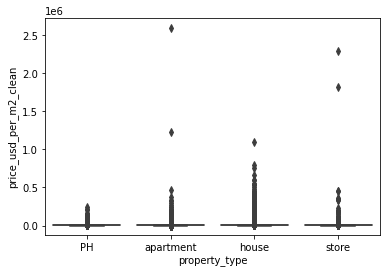

In [144]:
# Ver primero distribución de valores

sns.boxplot(data = data_clean, x = 'property_type', y = 'price_usd_per_m2_clean');

In [145]:
# Calcular los máximos y mínimos de cada tipo de propiedad y variable, tomando 2 IQR

def valores_limite (data, property_type, variable):
    quantil = data.loc[data['property_type'] == property_type][variable].quantile([.25, .5, .75])
    val_max = 2 * ( quantil[.75] - quantil[.25] ) + quantil[.75]
    val_min = - 2 * ( quantil[.75] - quantil[.25] ) + quantil[.25]
    return val_max, val_min

In [146]:
# Sacar los máximos y mínimos de precio/m2

price_per_m2_max_ph, price_per_m2_min_ph = valores_limite(data_clean, 'PH', 'price_usd_per_m2_clean')
price_per_m2_max_house, price_per_m2_min_house = valores_limite(data_clean, 'house', 'price_usd_per_m2_clean')
price_per_m2_max_apartment, price_per_m2_min_apartment = valores_limite(data_clean, 'apartment', 'price_usd_per_m2_clean')
price_per_m2_max_store, price_per_m2_min_store = valores_limite(data_clean, 'store', 'price_usd_per_m2_clean')


In [147]:
# Sacar los máximos y mínimos de precio/m2
# Filtro altos
# Armar máscaras por tipo de propiedad
mask_price_ph_alto = np.logical_and( (data_clean['price_usd_per_m2_clean'] > price_per_m2_max_ph), data_clean['property_type'] == 'PH' )
mask_price_apartment_alto = np.logical_and( (data_clean['price_usd_per_m2_clean'] > price_per_m2_max_apartment), data_clean['property_type'] == 'apartment' )
mask_price_house_alto = np.logical_and( (data_clean['price_usd_per_m2_clean'] > price_per_m2_max_house), data_clean['property_type'] == 'house' )
mask_price_store_alto = np.logical_and( (data_clean['price_usd_per_m2_clean'] > price_per_m2_max_store), data_clean['property_type'] == 'store' )

# Combinar todo en una gran mascara y ver el resultado
mask_price_alto1 = np.logical_or(mask_price_ph_alto, mask_price_apartment_alto)
mask_price_alto2 = np.logical_or(mask_price_house_alto, mask_price_store_alto)
mask_price_alto = np.logical_or(mask_price_alto2, mask_price_alto1)

In [148]:
print('Datos filtrados por filtro precio/m2 alto:', data_clean.loc[mask_price_alto].shape[0])

Datos filtrados por filtro precio/m2 alto: 4263


In [149]:
# Sacar los máximos y mínimos de precio/m2
# Filtro bajos
# Armar máscaras por tipo de propiedad
mask_price_ph_bajo = np.logical_and( (data_clean['price_usd_per_m2_clean'] < price_per_m2_min_ph), data_clean['property_type'] == 'PH' )
mask_price_apartment_bajo = np.logical_and( (data_clean['price_usd_per_m2_clean'] < price_per_m2_min_apartment), data_clean['property_type'] == 'apartment' )
mask_price_house_bajo = np.logical_and( (data_clean['price_usd_per_m2_clean'] < price_per_m2_min_house), data_clean['property_type'] == 'house' )
mask_price_store_bajo = np.logical_and( (data_clean['price_usd_per_m2_clean'] < price_per_m2_min_store), data_clean['property_type'] == 'store' )

# Combinar todo en una gran mascara y ver el resultado
mask_price_bajo1 = np.logical_or(mask_price_ph_bajo, mask_price_apartment_bajo)
mask_price_bajo2 = np.logical_or(mask_price_house_bajo, mask_price_store_bajo)
mask_price_bajo = np.logical_or(mask_price_bajo1, mask_price_bajo2)

In [150]:
print('Datos filtrados por filtro precio/m2 bajo:', data_clean.loc[mask_price_bajo].shape[0])

Datos filtrados por filtro precio/m2 bajo: 0


In [151]:
# Filtro para quedarse solo con los indices de las filas verdaderas
filtro_precio_alto = mask_price_alto.drop(mask_price_alto.loc[mask_price_alto == False].index, inplace = False)
data_clean = data_clean.drop(index = filtro_precio_alto.index)

filtro_precio_bajo = mask_price_bajo.drop(mask_price_bajo.loc[mask_price_bajo == False].index, inplace = False)
data_clean = data_clean.drop(index = filtro_precio_bajo.index)

data_clean.shape

(111673, 10)

In [152]:
# Sacar los máximos y mínimos de precio

price_max_ph, price_min_ph = valores_limite(data_clean, 'PH', 'price_usd_clean')
price_max_house, price_min_house = valores_limite(data_clean, 'house', 'price_usd_clean')
price_max_apartment, price_min_apartment = valores_limite(data_clean, 'apartment', 'price_usd_clean')
price_max_store, price_min_store = valores_limite(data_clean, 'store', 'price_usd_clean')

In [153]:
# Sacar los máximos y mínimos de precio
# Filtro altos
# Armar máscaras por tipo de propiedad
mask_price2_ph_alto = np.logical_and( (data_clean['price_usd_clean'] > price_max_ph), data_clean['property_type'] == 'PH' )
mask_price2_apartment_alto = np.logical_and( (data_clean['price_usd_clean'] > price_max_apartment), data_clean['property_type'] == 'apartment' )
mask_price2_house_alto = np.logical_and( (data_clean['price_usd_clean'] > price_max_house), data_clean['property_type'] == 'house' )
mask_price2_store_alto = np.logical_and( (data_clean['price_usd_clean'] > price_max_store), data_clean['property_type'] == 'store' )

# Combinar todo en una gran mascara y ver el resultado
mask_price2_alto1 = np.logical_or(mask_price2_ph_alto, mask_price2_apartment_alto)
mask_price2_alto2 = np.logical_or(mask_price2_house_alto, mask_price2_store_alto)
mask_price2_alto = np.logical_or(mask_price2_alto2, mask_price2_alto1)

In [154]:
print('Datos filtrados por filtro precio alto:', data_clean.loc[mask_price2_alto].shape[0])

Datos filtrados por filtro precio alto: 5206


In [155]:
# Sacar los máximos y mínimos de precio
# Filtro bajos
# Armar máscaras por tipo de propiedad
mask_price2_ph_bajo = np.logical_and( (data_clean['price_usd_clean'] < price_min_ph), data_clean['property_type'] == 'PH' )
mask_price2_apartment_bajo = np.logical_and( (data_clean['price_usd_clean'] < price_min_apartment), data_clean['property_type'] == 'apartment' )
mask_price2_house_bajo = np.logical_and( (data_clean['price_usd_clean'] < price_min_house), data_clean['property_type'] == 'house' )
mask_price2_store_bajo = np.logical_and( (data_clean['price_usd_clean'] < price_min_store), data_clean['property_type'] == 'store' )

# Combinar todo en una gran mascara y ver el resultado
mask_price2_bajo1 = np.logical_or(mask_price2_ph_bajo, mask_price2_apartment_bajo)
mask_price2_bajo2 = np.logical_or(mask_price2_house_bajo, mask_price2_store_bajo)
mask_price2_bajo = np.logical_or(mask_price2_bajo2, mask_price2_bajo1)

In [156]:
print('Datos filtrados por filtro precio bajo:', data_clean.loc[mask_price2_bajo].shape[0])

Datos filtrados por filtro precio bajo: 0


In [157]:
# Filtro para quedarse solo con los indices de las filas verdaderas
filtro_precio2_alto = mask_price2_alto.drop(mask_price2_alto.loc[mask_price2_alto == False].index, inplace = False)
data_clean = data_clean.drop(index = filtro_precio2_alto.index)

filtro_precio2_bajo = mask_price2_bajo.drop(mask_price2_bajo.loc[mask_price2_bajo == False].index, inplace = False)
data_clean = data_clean.drop(index = filtro_precio2_bajo.index)

data_clean.shape

(106467, 10)

In [158]:
# Sacar los máximos y mínimos de m2

m2_max_ph, m2_min_ph = valores_limite(data_clean, 'PH', 'surface_in_m2_clean')
m2_max_house, m2_min_house = valores_limite(data_clean, 'house', 'surface_in_m2_clean')
m2_max_apartment, m2_min_apartment = valores_limite(data_clean, 'apartment', 'surface_in_m2_clean')
m2_max_store, m2_min_store = valores_limite(data_clean, 'store', 'surface_in_m2_clean')

In [159]:
# Sacar los máximos y mínimos de m2
# Filtro altos
# Armar máscaras por tipo de propiedad
mask_m2_ph_alto = np.logical_and( (data_clean['surface_in_m2_clean'] > m2_max_ph), data_clean['property_type'] == 'PH' )
mask_m2_apartment_alto = np.logical_and( (data_clean['surface_in_m2_clean'] > m2_max_apartment), data_clean['property_type'] == 'apartment' )
mask_m2_house_alto = np.logical_and( (data_clean['surface_in_m2_clean'] > m2_max_house), data_clean['property_type'] == 'house' )
mask_m2_store_alto = np.logical_and( (data_clean['surface_in_m2_clean'] > m2_max_store), data_clean['property_type'] == 'store' )

# Combinar todo en una gran mascara y ver el resultado
mask_m2_alto1 = np.logical_or(mask_m2_ph_alto, mask_m2_apartment_alto)
mask_m2_alto2 = np.logical_or(mask_m2_house_alto, mask_m2_store_alto)
mask_m2_alto = np.logical_or(mask_m2_alto1, mask_m2_alto2)

In [160]:
print('Datos filtrados por filtro m2 alto:', data_clean.loc[mask_m2_alto].shape[0])

Datos filtrados por filtro m2 alto: 3143


In [161]:
# Sacar los máximos y mínimos de m2
# Filtro bajos
# Armar máscaras por tipo de propiedad
mask_m2_ph_bajo = np.logical_and( (data_clean['surface_in_m2_clean'] < m2_min_ph), data_clean['property_type'] == 'PH' )
mask_m2_apartment_bajo = np.logical_and( (data_clean['surface_in_m2_clean'] < m2_min_apartment), data_clean['property_type'] == 'apartment' )
mask_m2_house_bajo = np.logical_and( (data_clean['surface_in_m2_clean'] < m2_min_house), data_clean['property_type'] == 'house' )
mask_m2_store_bajo = np.logical_and( (data_clean['surface_in_m2_clean'] < m2_min_store), data_clean['property_type'] == 'store' )

# Combinar todo en una gran mascara y ver el resultado
mask_m2_bajo1 = np.logical_or(mask_m2_ph_bajo, mask_m2_apartment_bajo)
mask_m2_bajo2 = np.logical_or(mask_m2_house_bajo, mask_m2_store_bajo)
mask_m2_bajo = np.logical_or(mask_m2_bajo1, mask_m2_bajo2)

In [162]:
print('Datos filtrados por filtro m2 bajo:', data_clean.loc[mask_m2_bajo].shape[0])

Datos filtrados por filtro m2 bajo: 0


In [163]:
# Filtro para quedarse solo con los indices de las filas verdaderas
filtro_m2_alto = mask_m2_alto.drop(mask_m2_alto.loc[mask_m2_alto == False].index, inplace = False)
data_clean = data_clean.drop(index = filtro_m2_alto.index)

filtro_m2_bajo = mask_m2_bajo.drop(mask_m2_bajo.loc[mask_m2_bajo == False].index, inplace = False)
data_clean = data_clean.drop(index = filtro_precio2_bajo.index)

data_clean.shape

(103324, 10)

In [164]:
# Tirar los registros que no se pudieron completar ni con precio ni con superficie
# Armar un df auxiliar para hacer la copia y la pisada

mask_nulos = data_clean['surface_in_m2_clean'].isnull() | data_clean['price_usd_per_m2_clean'].isnull()
filtro_nulos = data_clean.loc[mask_nulos]
print('Datos filtrados por nulos:', filtro_nulos.shape[0])

Datos filtrados por nulos: 23406


In [165]:
data_clean = data_clean.drop(index = filtro_nulos.index)
data_clean.notnull().mean()*100

operation                 100.000000
property_type             100.000000
place_name                 99.976226
state_name                100.000000
description                99.998749
title                     100.000000
price_usd_clean           100.000000
surface_in_m2_clean       100.000000
price_usd_per_m2_clean    100.000000
cant_ambientes_clean       66.708376
dtype: float64

In [166]:
data_clean.shape

(79918, 10)

In [167]:
# Armar nuevo indice
nuevo_indice = range(0, data_clean.shape[0])
data_clean.index = nuevo_indice

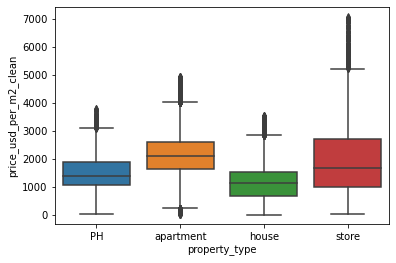

In [168]:
sns.boxplot(data = data_clean, x = 'property_type', y = 'price_usd_per_m2_clean');

# Conclusion de limpieza

In [169]:
# Estado final, datos completos por campo
(data_clean.notnull().mean())*100

operation                 100.000000
property_type             100.000000
place_name                 99.976226
state_name                100.000000
description                99.998749
title                     100.000000
price_usd_clean           100.000000
surface_in_m2_clean       100.000000
price_usd_per_m2_clean    100.000000
cant_ambientes_clean       66.708376
dtype: float64

In [170]:
# Numero de datos
data_clean.shape

(79918, 10)

In [171]:
print('Datos iniciales:', df_raw.shape[0])
print('Datos finales:', data_clean.shape[0])
print('Datos depurados:', round(data_clean.shape[0] / df_raw.shape[0], 4)*100, '%')

Datos iniciales: 121220
Datos finales: 79918
Datos depurados: 65.93 %


In [172]:
data_clean.dtypes

operation                  object
property_type              object
place_name                 object
state_name                 object
description                object
title                      object
price_usd_clean           float64
surface_in_m2_clean       float64
price_usd_per_m2_clean    float64
cant_ambientes_clean      float64
dtype: object

# Nuevas variables predictivas

In [173]:
# Mascaras de regex

In [174]:
# Buscar todas las menciones de pileta
patron1 = 'pileta|piscina|pisina|picina'
regex1 = re.compile(patron1, flags = re.IGNORECASE )

amenities1 = data_clean['description'].apply(lambda x: x if x is np.NaN else regex1.search(x))
# Mascara para tener los registros que saco regex
mask_pileta = amenities1.notnull()

# Sacar los store con pileta, solo considerar casas
mask_not_store = data_clean['property_type'] != 'store'
mask_amenities1 = np.logical_and(mask_pileta, mask_not_store)


<p style="color:#FF0000";> Bien el filtro lógico de que los store no tienen (o no suelen tener) pileta

In [175]:
# para verificar que no hay negocios con pileta
data_clean.loc[mask_amenities1]['property_type'].value_counts()

house        10759
apartment    10477
PH             185
Name: property_type, dtype: int64

In [176]:
# versus lo que saco la regex
data_clean.loc[mask_pileta]['property_type'].value_counts()

house        10759
apartment    10477
PH             185
store           59
Name: property_type, dtype: int64

In [177]:
# Cargar la nueva columna al dataset
data_clean['amenities_pileta'] = mask_amenities1

In [178]:
# Buscar todas las menciones de SUM
patron2= '\sSUM\s'
regex2 = re.compile(patron2, flags = re.IGNORECASE )

amenities2 = data_clean['description'].apply(lambda x: x if x is np.NaN else regex2.search(x))

mask_amenities2 = amenities2.notnull()
data_clean.loc[mask_amenities2].shape

(3051, 11)

In [179]:
# Cargar la nueva columna al dataset
data_clean['amenities_SUM'] = mask_amenities2

In [180]:
# Buscar todas las menciones de parrilla
patron3 = 'parrill'
regex3 = re.compile(patron3, flags = re.IGNORECASE )

amenities3 = data_clean['description'].apply(lambda x: x if x is np.NaN else regex3.search(x))

mask_amenities3 = amenities3.notnull()
data_clean.loc[mask_amenities3].shape


(25715, 12)

In [181]:
# Cargar la nueva columna al dataset
data_clean['amenities_parrilla'] = mask_amenities3

In [182]:
# Buscar todas las menciones de garage/estacionamiento
patron4 = 'garage|estacionamiento|cochera'
regex4 = re.compile(patron4, flags = re.IGNORECASE )

amenities4 = data_clean['description'].apply(lambda x: x if x is np.NaN else regex4.search(x))

mask_amenities4 = amenities4.notnull()
data_clean.loc[mask_amenities4].shape

(33811, 13)

In [183]:
# Cargar la nueva columna al dataset
data_clean['amenities_garage'] = mask_amenities4

# Cierre

In [184]:
# Data set inicial

In [185]:
df_raw.shape

(121220, 26)

In [186]:
# Datos completos
(df_raw.notnull().mean())*100

Unnamed: 0                    100.000000
operation                     100.000000
property_type                 100.000000
place_name                     99.981026
place_with_parent_names       100.000000
country_name                  100.000000
state_name                    100.000000
geonames_id                    84.559479
lat-lon                        57.474014
lat                            57.474014
lon                            57.474014
price                          83.162844
currency                       83.162019
price_aprox_local_currency     83.162844
price_aprox_usd                83.162844
surface_total_in_m2            67.556509
surface_covered_in_m2          83.577792
price_usd_per_m2               56.605346
price_per_m2                   72.313150
floor                           6.516251
rooms                          39.094209
expenses                       11.765385
properati_url                 100.000000
description                    99.998350
title           

In [187]:
# Data set final

In [188]:
data_clean.shape

(79918, 14)

In [189]:
# Datos completos
(data_clean.notnull().mean())*100

operation                 100.000000
property_type             100.000000
place_name                 99.976226
state_name                100.000000
description                99.998749
title                     100.000000
price_usd_clean           100.000000
surface_in_m2_clean       100.000000
price_usd_per_m2_clean    100.000000
cant_ambientes_clean       66.708376
amenities_pileta          100.000000
amenities_SUM             100.000000
amenities_parrilla        100.000000
amenities_garage          100.000000
dtype: float64

In [190]:
print('Datos iniciales:', df_raw.shape[0])
print('Datos finales:', data_clean.shape[0])
print('Datos finales:', round(data_clean.shape[0] / df_raw.shape[0], 4)*100, '% datos iniciales')

Datos iniciales: 121220
Datos finales: 79918
Datos finales: 65.93 % datos iniciales


In [191]:
data_clean['property_type'].value_counts()

apartment    45952
house        27599
PH            4068
store         2299
Name: property_type, dtype: int64

In [192]:
mask_house = data_clean['property_type'] == 'house'
mask_apartment = data_clean['property_type'] == 'apartment'
mask_ph = data_clean['property_type'] == 'PH'
mask_store = data_clean['property_type'] == 'store'


In [193]:
surface_house = data_clean.loc[mask_house, ['surface_in_m2_clean']]
price_house = data_clean.loc[mask_house, ['price_usd_clean']]
surface_apartment = data_clean.loc[mask_apartment, ['surface_in_m2_clean']]
price_apartment = data_clean.loc[mask_apartment, ['price_usd_clean']]
surface_ph = data_clean.loc[mask_ph, ['surface_in_m2_clean']]
price_ph = data_clean.loc[mask_ph, ['price_usd_clean']]
surface_store = data_clean.loc[mask_store, ['surface_in_m2_clean']]
price_store = data_clean.loc[mask_store, ['price_usd_clean']]

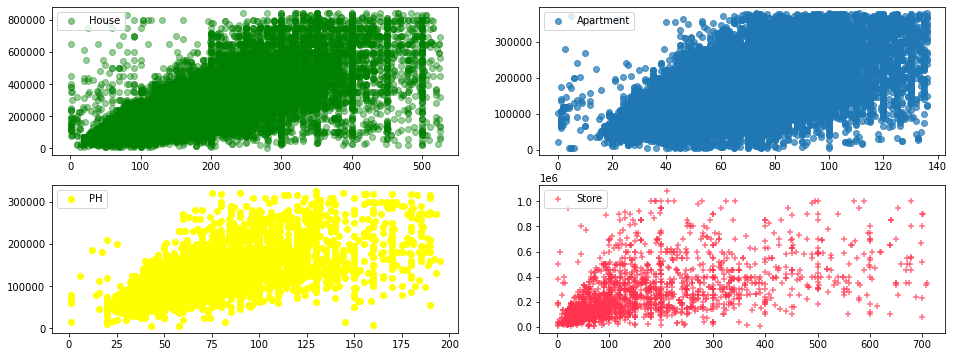

In [194]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(16,6)

ax[0, 0].scatter(surface_house, price_house, marker = 'o', color = "green", label='House', alpha = 0.4)
#ax[0, 0].set_xlim(0, 550)
#ax[0, 0].set_ylim(0, 1000000)

ax[0, 1].scatter(surface_apartment, price_apartment, label='Apartment', alpha = 0.7);
#ax[0, 1].set_xlim(0, 150)
#ax[0, 1].set_ylim(0, 400000)

ax[1, 0].scatter(surface_ph, price_ph, label='PH', alpha = 1, color = "yellow")
#ax[1, 0].set_xlim(0, 200)

ax[1, 1].scatter(surface_store, price_store, marker = '+', color = (1.0, 0.2, 0.3), label='Store', alpha = 0.7)
#ax[1, 1].set_xlim(0, 800)
#ax[1, 1].set_ylim(0, 1200000)

ax[0,0].legend();
ax[0,1].legend();
ax[1,0].legend();
ax[1,1].legend();

In [195]:
mask_CABA = data_clean['state_name'] == "Capital Federal"
data_clean.loc[mask_CABA, ['place_name']].value_counts()

place_name     
Caballito          1822
Belgrano           1775
Palermo            1748
Villa Urquiza      1274
Villa Crespo       1092
                   ... 
Velez Sarsfield      34
Palermo Viejo        26
Villa Soldati        13
Villa Riachuelo       4
Catalinas             2
Length: 62, dtype: int64

In [196]:
mask_belgrano = data_clean['place_name'] == 'Belgrano'
mask_palermo = data_clean['place_name'] == 'Palermo'
mask_caballito = data_clean['place_name'] == 'Caballito'
mask_villa_urquiza = data_clean['place_name'] == 'Villa Urquiza'

In [197]:
surface_belgrano = data_clean.loc[mask_belgrano, ['surface_in_m2_clean']]
price_belgrano = data_clean.loc[mask_belgrano, ['price_usd_clean']]
surface_palermo = data_clean.loc[mask_palermo, ['surface_in_m2_clean']]
price_palermo = data_clean.loc[mask_palermo, ['price_usd_clean']]
surface_caballito = data_clean.loc[mask_caballito, ['surface_in_m2_clean']]
price_caballito = data_clean.loc[mask_caballito, ['price_usd_clean']]
surface_villa_urquiza = data_clean.loc[mask_villa_urquiza, ['surface_in_m2_clean']]
price_villa_urquiza = data_clean.loc[mask_villa_urquiza, ['price_usd_clean']]

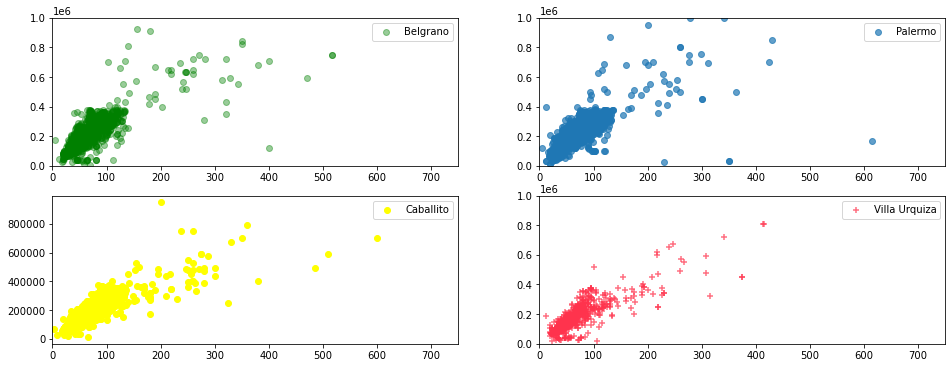

In [198]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(16,6)

ax[0, 0].scatter(surface_belgrano, price_belgrano, marker = 'o', color = "green", label='Belgrano', alpha = 0.4)
ax[0, 0].set_xlim(0, 750)
ax[0, 0].set_ylim(0, 1000000)

ax[0, 1].scatter(surface_palermo, price_palermo, label='Palermo', alpha = 0.7);
ax[0, 1].set_xlim(0, 750)
ax[0, 1].set_ylim(0, 1000000)

ax[1, 0].scatter(surface_caballito, price_caballito, label='Caballito', alpha = 1, color = "yellow")
ax[1, 0].set_xlim(0, 750)
ax[1, 1].set_ylim(0, 1000000)

ax[1, 1].scatter(surface_villa_urquiza, price_villa_urquiza, marker = '+', color = (1.0, 0.2, 0.3), label='Villa Urquiza', alpha = 0.7)
ax[1, 1].set_xlim(0, 750)
ax[1, 1].set_ylim(0, 1000000)

ax[0,0].legend();
ax[0,1].legend();
ax[1,0].legend();
ax[1,1].legend();

<p style="color:#FF0000";> Buen trabajo chicos, creo que hay algunos errores que pueden repercutir en el desafio 2 que sería importante que corrijan (están señalados). Recuerden que gran parte del éxito del modelo depende de la preparación de los datos
    
<p style="color:#FF0000";> Hay oportunidades de mejoras vinculadas al a presentación del trabajo, todo lo vinculado al uso de markdowns para guiar al lector y seperar etapas de procesamientos. También creo que pueden optimizarse los procesos de limpieza de outliers en menos lineas o al menos creando una función que haga todo el proceso y no una sola parte (calculo de umbrales)
<p style="color:#FF0000";> Por último, considero que también se podría haber hecho algo más en lo respectivo a visualización  y no abusar tanto de la presentación de estadísticas o tablas para mostrar información
    
<h1 style="color:#FF0000";> Felicitaciones por el trabajo, a seguir !